In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [78]:
# Download stock data (Tesla stock example)
stock_symbol = "GOOGL"
data = yf.download(stock_symbol, start="2010-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [79]:
# Check the data
print(data.tail())

Price           Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                            
2022-12-23  88.907700  89.226543  86.755498  86.795354  23003000
2022-12-27  87.074348  88.618753  86.695724  88.479259  20097300
2022-12-28  85.709297  87.722005  85.629592  86.665836  19523200
2022-12-29  88.130516  88.529073  86.297166  86.307132  23333500
2022-12-30  87.911316  87.981063  86.257308  86.665831  23986300


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
# Use only the 'Close' column for prediction
close_data = data['Close'].values.reshape(-1, 1)

In [82]:
# Normalize the data (scale values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

In [83]:
# Create data sequences for LSTM (e.g., using 60 previous days to predict the next day)
lookback = 60  # Number of previous days for prediction

In [84]:
x_train, y_train = [], []

In [85]:
for i in range(lookback, len(scaled_data)):
    x_train.append(scaled_data[i-lookback:i, 0])  # Input features
    y_train.append(scaled_data[i, 0])  # Target value (next day's price)

In [86]:
# Convert lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape x_train to 3D array for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [88]:
# Build the LSTM model
model = Sequential()

In [89]:
# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Regularization to prevent overfitting

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
# Second LSTM layer (return_sequences=True to allow stacking)
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [91]:
# Third LSTM layer (return_sequences=False because it's the last LSTM layer)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

In [92]:
# Fully connected output layer
model.add(Dense(units=1))  # Predicting a single value

In [93]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0203
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0019
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0018
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0015
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0019
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0015
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0016
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0013
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0015
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0013
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0013
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0013
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0014
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0014
Epoch 15/20
101/101 ━━━━━━━━━━━━━━━━━━━

In [95]:
# Prepare test data
test_data = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
test_close_data = test_data['Close'].values.reshape(-1, 1)
scaled_test_data = scaler.transform(test_close_data)

[*********************100%***********************]  1 of 1 completed


In [96]:
x_test, y_test = [], []
for i in range(lookback, len(scaled_test_data)):
    x_test.append(scaled_test_data[i-lookback:i, 0])
    y_test.append(scaled_test_data[i, 0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [98]:
# Make predictions
predictions = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [99]:
# Inverse scaling to get actual predicted values
predicted_stock_price = scaler.inverse_transform(predictions)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

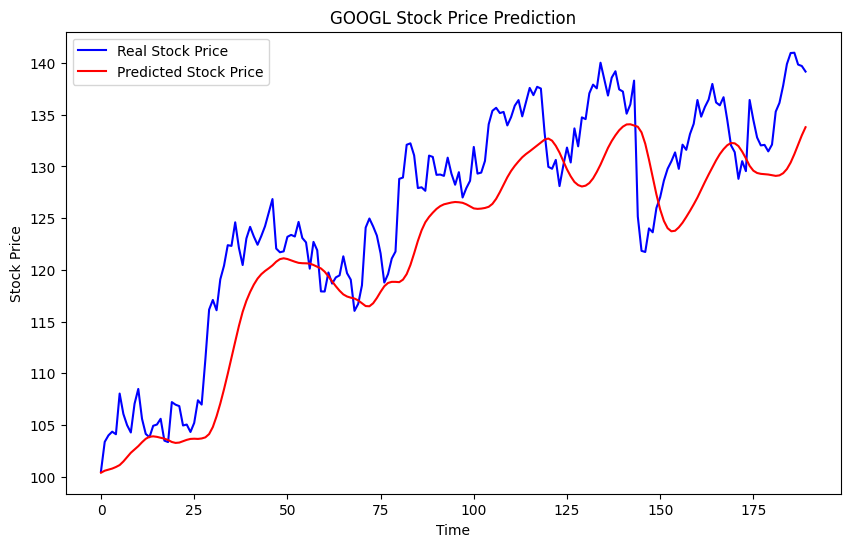

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 32.161816509846155


In [102]:
# Calculate MAPE
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 3.69%
